# Grupo:
164213 - Andreza Aparecida dos Santos 

225240 - Leonardo Maçal 

081938 - Ligia Vasconcelos


Tarefa:

O objetivo do trabalho é classificar os dados faltantes de 3 variáveis especificas (idade, sexo e chol) em MCAR (Missing Completely at Random), MAR (Missing at Random) ou MNAR (Missing not at Random). Segundo o autor Rubin, os problemas de dados perdidos podem ser classificados em três categorias. Em sua teoria, cada ponto de dados tem alguma probabilidade de estar faltando. 

Se a probabilidade de estar faltando é a mesma para todos os casos, então se diz que os dados estão faltando completamente ao acaso (MCAR). Isso implica efetivamente que as causas dos dados ausentes não estão relacionadas aos dados. Consequentemente, podemos ignorar muitas das complexidades que surgem devido à falta de dados, além da óbvia perda de informações. Um exemplo de MCAR é uma balança que ficou com falhas ocasionais, como o exemplo do professor André no peso dos zumbis. Segundo o mesmo autor, embora seja conveniente, o MCAR costuma ser irreal para os conjuntos de dados.

Se a probabilidade de estar faltando é a mesma apenas dentro dos grupos definidos pelos dados observados, então os dados estão faltando aleatoriamente (MAR). MAR é uma classe muito mais ampla do que MCAR. Por exemplo, quando colocada em uma superfície macia, uma balança pode produzir mais valores ausentes do que quando colocada em uma superfície dura. Esses dados não são, portanto, MCAR. Se, no entanto, sabemos o tipo de superfície e se podemos assumir MCAR dentro do tipo de superfície, então os dados são MAR. 

Se nem MCAR nem MAR forem válidos, então falamos em falta não ao acaso (MNAR). MNAR significa que a probabilidade de estar perdido varia por razões que desconhecemos. Por exemplo, o mecanismo da balança de pesagem pode se desgastar com o tempo, produzindo mais dados perdidos com o passar do tempo, mas podemos deixar de notar isso. Se os objetos mais pesados ​​forem medidos posteriormente, obteremos uma distribuição das medições que será distorcida. MNAR inclui a possibilidade de que a escala produza mais valores ausentes para os objetos mais pesados, uma situação que pode ser difícil de reconhecer e controlar.

A distinção de Rubin é importante para entender por que alguns métodos funcionam e outros não. Sua teoria estabelece as condições sob as quais um método de dados ausentes pode fornecer inferências estatísticas válidas. A maioria das correções simples funciona apenas sob a suposição MCAR restritiva e frequentemente irreal. 
Para as 3 variáveis do exercício, executamos os mesmos procedimentos: criamos uma nova coluna denominada missing_age, missing_sex e missing_chol,  para mapear as linhas do banco de dados em que falta esse dado. Para as posições em que não temos a informação, a coluna "missing" assume valor 1 (um), para as demais posições onde esse dado está presente, assume valor 0 (zero). 

Com isto posto, identificamos as correlações entre a variável com valores faltantes e as demais, plotamos a distribuição dos campos das variáveis, box plot e analisamos as informações do comportamento de dispersão de cada variável.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
missing_age_data_path = "heart/processed/heart-missing-age.csv"
missing_sex_data_path = "heart/processed/heart-missing-sex.csv"
missing_chol_data_path = "heart/processed/heart-missing-chol.csv"

In [3]:
age_df = pd.read_csv(missing_age_data_path)
sex_df = pd.read_csv(missing_sex_data_path)
chol_df = pd.read_csv(missing_chol_data_path)

# Missing Age Dataset

Análise do dataset de idade faltante

In [4]:
age_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,NaN,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Criamos uma nova columa para denominada "missing_age" para mapear as linhas do banco de dados em que falta esse dado. Para as posições em que não temos a informação de idade, a coluna "missing_age" assume valor 1 (um), para as demais posições onde esse dado está presente, assume valor 0 (zero).

In [5]:
age_df['missing_age'] = np.where(age_df['age'].isnull(), 1, 0)

In [6]:
age_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_age
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,NaN,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


Primeiramente podemos verificar se existe alta correlação negativa ou positiva entre a coluna faltante e as demais informações. Isso pode nos dar uma ideia de possível comportamento para as ocorrências de dados faltantes.

In [7]:
age_df[age_df.columns[:]].corr()['missing_age']

age                 NaN
sex           -0.539194
cp             0.011762
trestbps       0.122651
chol           0.116199
fbs           -0.009940
restecg       -0.039050
thalach        0.104246
exang         -0.103568
oldpeak       -0.038064
slope          0.060080
ca            -0.102480
thal          -0.121596
target         0.171961
missing_age    1.000000
Name: missing_age, dtype: float64

Estabelecendo a correlação entre a variável missing_age e as demais, encontramos uma forte correlação entre ela e a variável sex: **-0,54**, possuindo um alto valor de correlação negativa. Isso significa que, para esses dois conjuntos de dados, quando o valor em um conjunto aumenta, o valor correspondente no outro conjunto tende a diminuir. Para as demais correlações, observamos valores de correlação muito próximos de zero, indicando que não possuem um comportamento possivelmente correlacionado.

Procurando entender mais a fundo, após plotar os dados no espaço, podemos ver que quando os dados de sexo assumem valor 0 (zero), temos tanto a presença (missing_age = 0) quanto a falta (missing_age = 1) de dados de idade. Porém quando olhamos para o comportamento quando os dados de sexo assumem valor 1 (um), não temos o mesmo comportamento, não existindo dados faltantes (missing_age = 1) para esse valor de sexo. Ou seja, só existe dado faltante na idade quando sexo assume valor igual a 0.

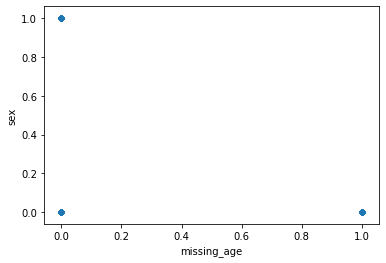

In [8]:
age_df.plot.scatter("missing_age", "sex")

Podemos ainda, verificar se dentro do conjunto de dados faltantes de idade, se existe alguma relação entre os valores das demais variáveis. Vamos plotar os gráficos da variável "missing_age" com cada uma das demais para verificar se podemos extrair da análise visual algum tipo de comportamento

In [9]:
missing_age_df = age_df.loc[age_df['missing_age'] == 1]

In [10]:
missing_age_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_age
2,NaN,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
14,NaN,0,3,150,283,1,0,162,0,1.0,2,0,2,1,1
17,NaN,0,3,150,226,0,1,114,0,2.6,0,0,2,1,1
19,NaN,0,3,140,239,0,1,151,0,1.8,2,2,2,1,1
36,NaN,0,2,135,304,1,1,170,0,0.0,2,0,2,1,1
39,NaN,0,2,160,360,0,0,151,0,0.8,2,0,2,1,1
40,NaN,0,2,140,308,0,0,142,0,1.5,2,1,2,1,1
43,NaN,0,0,130,264,0,0,143,0,0.4,1,0,2,1,1
49,NaN,0,0,138,234,0,0,160,0,0.0,2,0,2,1,1
53,NaN,0,2,108,141,0,1,175,0,0.6,1,0,2,1,1


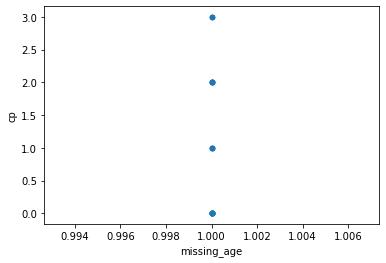

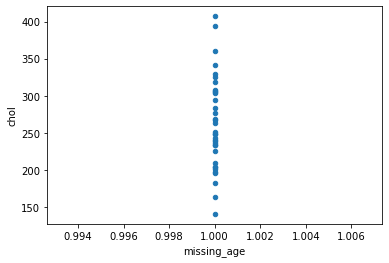

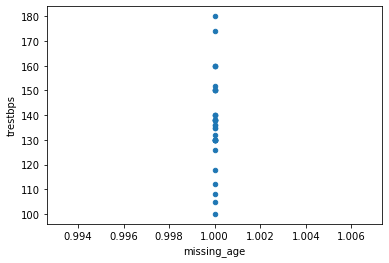

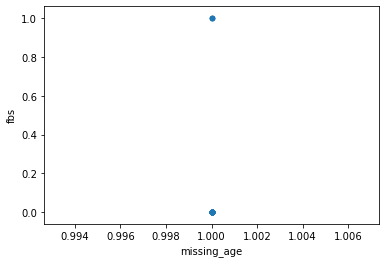

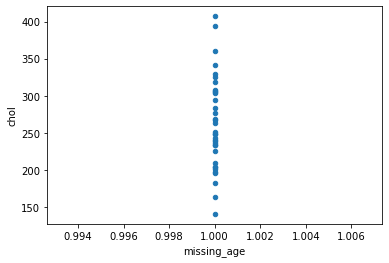

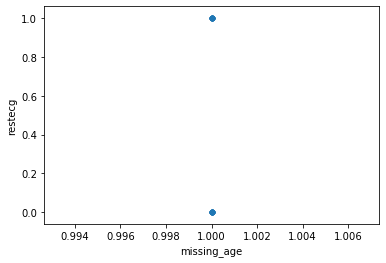

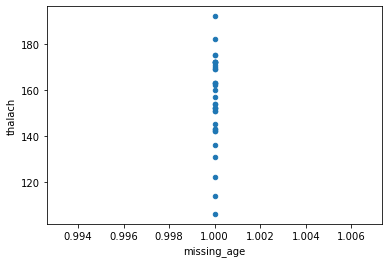

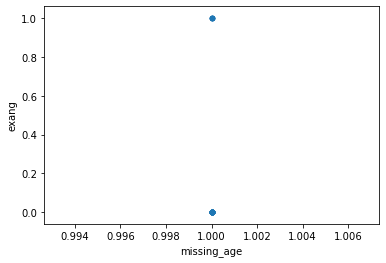

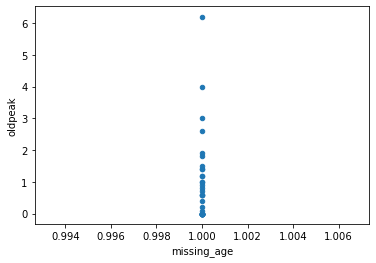

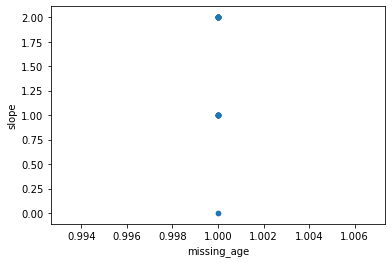

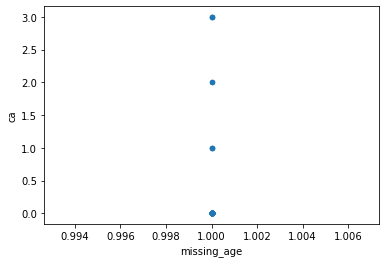

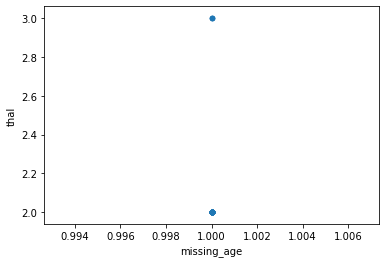

In [11]:
missing_age_df.plot.scatter("missing_age", "cp")
missing_age_df.plot.scatter("missing_age", "chol")
missing_age_df.plot.scatter("missing_age", "trestbps")
missing_age_df.plot.scatter("missing_age", "fbs")
missing_age_df.plot.scatter("missing_age", "chol")
missing_age_df.plot.scatter("missing_age", "restecg")
missing_age_df.plot.scatter("missing_age", "thalach")
missing_age_df.plot.scatter("missing_age", "exang")
missing_age_df.plot.scatter("missing_age", "oldpeak")
missing_age_df.plot.scatter("missing_age", "slope")
missing_age_df.plot.scatter("missing_age", "ca")
missing_age_df.plot.scatter("missing_age", "thal")

Desses gráficos mostrados acima, observamos que a distribuição de cada variável dentro desse conjunto parece se distribuir de forma uniforme, não apresentando nenhum padrão anormal ou “quebra abrupta” de distribuição das variáveis. Concluindo-se que não há nenhuma tendência de comportamento entre os dados faltantes e os demais dados da tabela.

Utilizando a função describe, podemos identificar as informações de distribuição de cada uma das variáveis. Comparando as tabelas describe do banco de dados completo com a do banco de dados filtrado por idades faltantes, podemos notar algumas alterações no padrão de distribuição, mas a única alteração gritante de fato ocorre na variável sexo, onde valores faltantes ocorrem exclusivamente quando sexo = 0, como já identificamos anteriormente.

In [12]:
age_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_age
count,267.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.456929,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.118812
std,9.048793,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.324102
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


In [13]:
missing_age_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_age
count,0.0,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,NaN,0.0,1.000000,137.472222,262.638889,0.138889,0.472222,156.138889,0.194444,0.919444,1.500000,0.444444,2.111111,0.777778,1.0
std,NaN,0.0,1.095445,17.278370,61.682205,0.350736,0.506309,18.772553,0.401386,1.319051,0.609449,0.939436,0.318728,0.421637,0.0
min,NaN,0.0,0.000000,100.000000,141.000000,0.000000,0.000000,106.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.0
25%,NaN,0.0,0.000000,130.000000,222.000000,0.000000,0.000000,144.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.0
50%,NaN,0.0,1.000000,137.000000,250.500000,0.000000,0.000000,158.500000,0.000000,0.600000,2.000000,0.000000,2.000000,1.000000,1.0
75%,NaN,0.0,2.000000,150.000000,305.250000,0.000000,1.000000,171.250000,0.000000,1.250000,2.000000,0.000000,2.000000,1.000000,1.0
max,NaN,0.0,3.000000,180.000000,407.000000,1.000000,1.000000,192.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000,1.0


As alterações de distribuição das variáveis, quando visualizadas nos bloxplot lado a lado, podem ser interpretadas com maior facilidade, apesar de não configurarem alterações demasiado chamativas.

Desses gráficos mostrados acima, observamos que a distribuição de cada variável dentro desse conjunto parece se distribuir de forma relativamente uniforme. Concluindo-se que não há nenhuma tendência de comportamento entre os dados faltantes e os demais dados da tabela.


Sendo assim, podemos classificar essa falta de dados de idade como **MAR** (Missing at Random) por estar dependente do sexo 0 (zero), mas não dos valores faltantes de idade.

# Missing Sex Dataset

Analogamente a variável anterior, estabelecemos as correlações entre os dados faltantes na variável sexo e cada uma das demais variáveis do conjunto de dados. 


In [14]:
sex_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,NaN,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,NaN,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1.0,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1.0,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1.0,0,130,131,0,1,115,1,1.2,1,1,3,0


Criamos uma nova columa para denominada "missing_sex" para mapear as linhas do banco de dados em que falta esse dado. Para as posições em que não temos a informação de sexo, a coluna "missing_sex" assume valor 1 (um), para as demais posições onde esse dado está presente, assume valor 0 (zero).

In [15]:
sex_df['missing_sex'] = np.where(sex_df['sex'].isnull(), 1, 0)

In [16]:
sex_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_sex
0,63,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1.0,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,NaN,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1.0,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,NaN,0,120,354,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0.0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1.0,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1.0,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1.0,0,130,131,0,1,115,1,1.2,1,1,3,0,0


Primeiramente podemos verificar se existe alta correlação negativa ou positiva entre a coluna faltante e as demais informações. Isso pode nos dar uma ideia de possível comportamento para as ocorrências de dados faltantes.

In [17]:
sex_df[sex_df.columns[:]].corr()['missing_sex']

age           -0.018597
sex                 NaN
cp             0.041144
trestbps       0.084402
chol           0.152133
fbs           -0.046057
restecg        0.036710
thalach        0.054220
exang         -0.115070
oldpeak       -0.049905
slope          0.078157
ca            -0.085079
thal          -0.161627
target         0.246261
missing_sex    1.000000
Name: missing_sex, dtype: float64

Desta vez não tivemos nenhuma correlação alta entre as duas informações. De qualquer forma, investigamos o comportamento da distribuição da variável target, que foi a maior correlação encontrada, **0,25**.

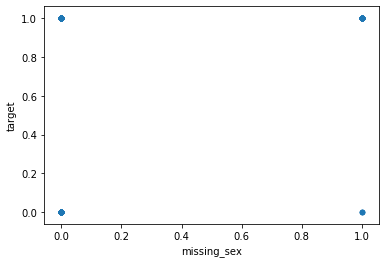

In [18]:
sex_df.plot.scatter("missing_sex", "target")

Diferentemente do primeiro caso, a existência de campos vazios na variável sexo ocorre tanto para targets 1 quanto targets 0, ou seja, não há a mesma relação clara encontrada anteriormente.

Investigando outras possibilidades de comportamento, seguimos os mesmos passos do exercício anterior.

In [19]:
missing_sex_df = sex_df.loc[sex_df['missing_sex'] == 1]

In [20]:
missing_sex_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_sex
2,41,NaN,1,130,204,0,0,172,0,1.4,2,0,2,1,1
4,57,NaN,0,120,354,0,1,163,1,0.6,2,0,2,1,1
6,56,NaN,1,140,294,0,0,153,0,1.3,1,0,2,1,1
14,58,NaN,3,150,283,1,0,162,0,1.0,2,0,2,1,1
15,50,NaN,2,120,219,0,1,158,0,1.6,1,0,2,1,1
16,58,NaN,2,120,340,0,1,172,0,0.0,2,0,2,1,1
25,71,NaN,1,160,302,0,1,162,0,0.4,2,2,2,1,1
28,65,NaN,2,140,417,1,0,157,0,0.8,2,1,2,1,1
40,51,NaN,2,140,308,0,0,142,0,1.5,2,1,2,1,1
48,53,NaN,2,128,216,0,0,115,0,0.0,2,0,0,1,1


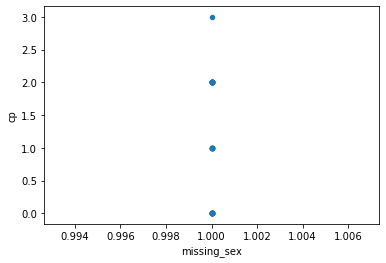

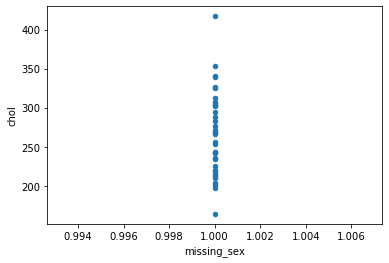

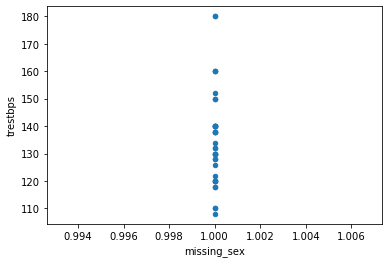

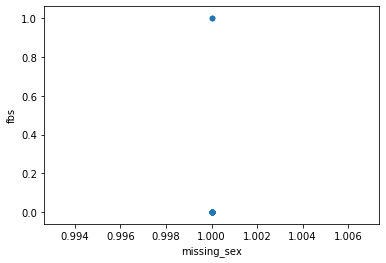

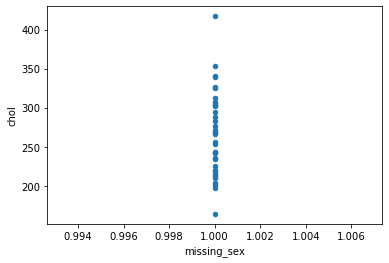

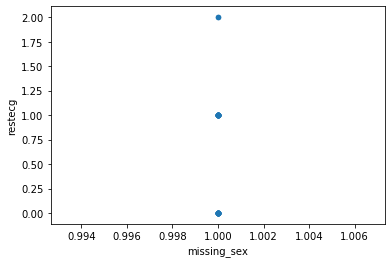

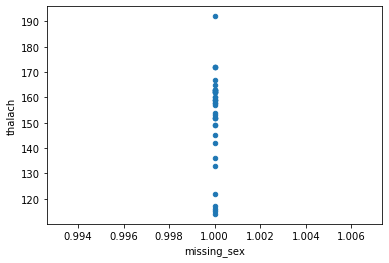

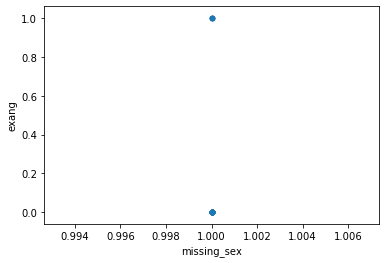

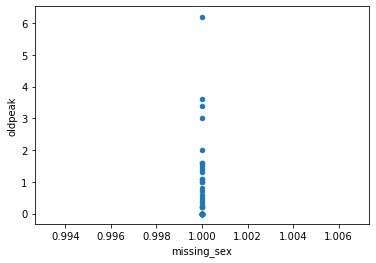

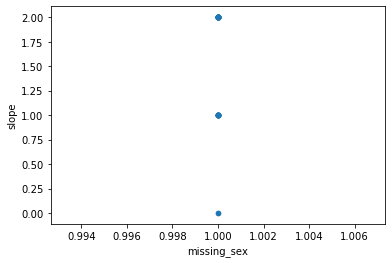

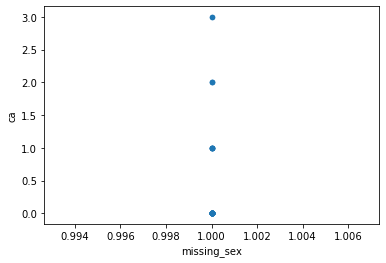

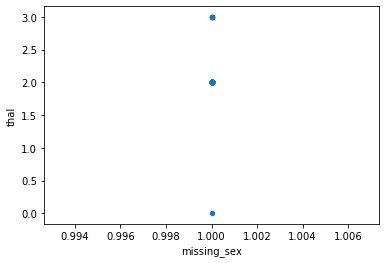

In [21]:
missing_sex_df.plot.scatter("missing_sex", "cp")
missing_sex_df.plot.scatter("missing_sex", "chol")
missing_sex_df.plot.scatter("missing_sex", "trestbps")
missing_sex_df.plot.scatter("missing_sex", "fbs")
missing_sex_df.plot.scatter("missing_sex", "chol")
missing_sex_df.plot.scatter("missing_sex", "restecg")
missing_sex_df.plot.scatter("missing_sex", "thalach")
missing_sex_df.plot.scatter("missing_sex", "exang")
missing_sex_df.plot.scatter("missing_sex", "oldpeak")
missing_sex_df.plot.scatter("missing_sex", "slope")
missing_sex_df.plot.scatter("missing_sex", "ca")
missing_sex_df.plot.scatter("missing_sex", "thal")

Estudando com cuidado o comportamento de distribuição dos quartis, é possível identificar alguns pontos de atenção quando comparamos os valores dos quartis do banco de dados completo versus os quartis do banco de dados quando sex igual a valores vazios:

In [22]:
sex_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_sex
count,303.000000,265.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.781132,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.125413
std,9.082101,0.414261,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.331734
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,1.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


In [23]:
missing_sex_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_sex
count,38.000000,0.0,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,53.921053,NaN,1.078947,135.526316,267.052632,0.105263,0.578947,152.921053,0.184211,0.886842,1.526316,0.500000,2.052632,0.868421,1.0
std,9.350189,NaN,0.941005,17.055928,53.087357,0.311012,0.598718,17.584363,0.392859,1.311317,0.603451,0.862116,0.461921,0.342570,0.0
min,34.000000,NaN,0.000000,108.000000,164.000000,0.000000,0.000000,114.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,49.000000,NaN,0.000000,123.000000,221.250000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.0
50%,54.000000,NaN,1.000000,133.000000,267.500000,0.000000,1.000000,158.500000,0.000000,0.350000,2.000000,0.000000,2.000000,1.000000,1.0
75%,61.000000,NaN,2.000000,140.000000,303.000000,0.000000,1.000000,162.750000,0.000000,1.250000,2.000000,1.000000,2.000000,1.000000,1.0
max,76.000000,NaN,3.000000,180.000000,417.000000,1.000000,2.000000,192.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000,1.0


| old peak  |  banco de dados original | banco de dados filtrado pelos dados faltantes de sexo |
| --------- | ------------------------ | -------------------------------------------------------|
| Média         | 1,03 | 0,886842 |
| Desvio Padrão | 1,16 | 1,311317 |
| Mínimo        | 0    | 0        |
| Q1 (P25)      | 0    | 0        |
| Q2 (Mediana)  | 0,8  | 0,35     |
| Q3 (P75)      | 1,6  | 1,25     |
| Máximo        | 6,2  | 6,2      |

Algumas das distribuições das variáveis sugerem um padrão MNAR (Missing not at Random), uma vez que, comparando Q1, Q2 (mediana) e Q3 temos um claro indício de que algumas variáveis têm padrão de distribuição bastante alterado quando a variavel sex está vazia, destacando-se a variável oldpeak, conforme comparativo abaixo:

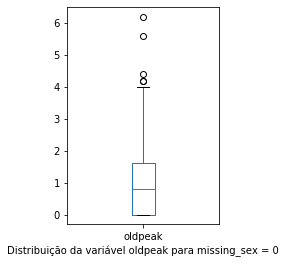

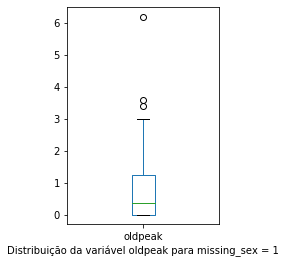

In [42]:
oldpeak_all = sex_df['oldpeak']
oldpeak_missing = missing_sex_df['oldpeak']

ax1 = plt.subplot(1, 2, 1)
ax1.set_xlabel("Distribuição da variável oldpeak para missing_sex = 0")
plt.show(oldpeak_all.plot.box())

ax2 = plt.subplot(1, 2, 2)
ax2.set_xlabel("Distribuição da variável oldpeak para missing_sex = 1")
plt.show(oldpeak_missing.plot.box())

Ao que tudo indica, quando a variável sex está vazia, a concentração de valores de oldpeak se corresponde a valores menores. Conforme comentamos no início, o padrão **MNAR** está relacionado a um evento específico, como o exemplo da balança. Com as informações disponíveis não é possível validar hipóteses plausíveis para entendermos o porquê deste comportamento. 


# Missing Chol Dataset

Pela terceira vez, demos inicio a análise estabelecendo as correlações entre dados faltantes da variável Chol e as demais variáveis do conjunto de dados.

In [26]:
chol_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,NaN,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,NaN,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264.0,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,NaN,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131.0,0,1,115,1,1.2,1,1,3,0


Adicionamos a nova coluna no conjunto de dados para mapear os dados faltantes

In [27]:
chol_df['missing_chol'] = np.where(chol_df['chol'].isnull(), 1, 0)

In [28]:
chol_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_chol
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,NaN,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,NaN,0,1,123,1,0.2,1,0,3,0,1
299,45,1,3,110,264.0,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,NaN,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131.0,0,1,115,1,1.2,1,1,3,0,0


In [29]:
chol_df[chol_df.columns[:]].corr()['missing_chol']

age             0.018519
sex             0.041103
cp             -0.001793
trestbps        0.080885
chol                 NaN
fbs             0.023372
restecg         0.030290
thalach         0.013402
exang           0.044806
oldpeak         0.116721
slope          -0.001391
ca              0.003883
thal            0.062199
target         -0.062143
missing_chol    1.000000
Name: missing_chol, dtype: float64

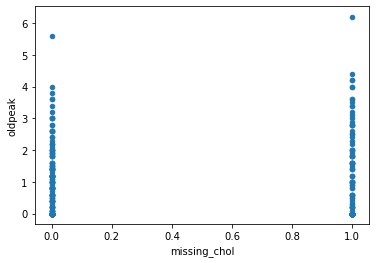

In [30]:
chol_df.plot.scatter("missing_chol", "oldpeak")

In [31]:
missing_chol_df = chol_df.loc[chol_df['missing_chol'] == 1]

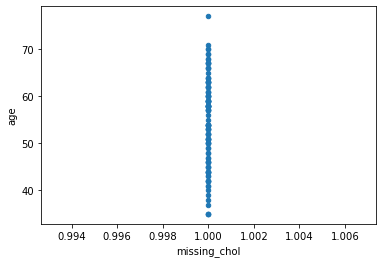

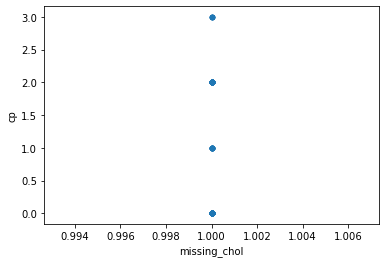

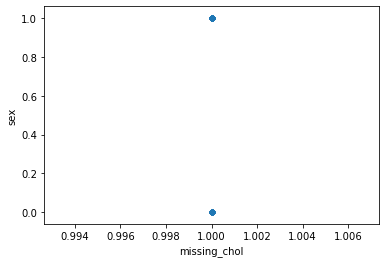

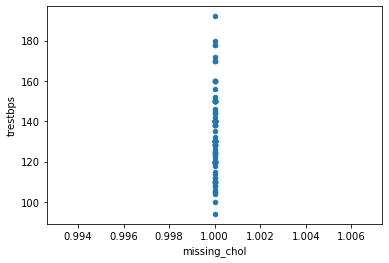

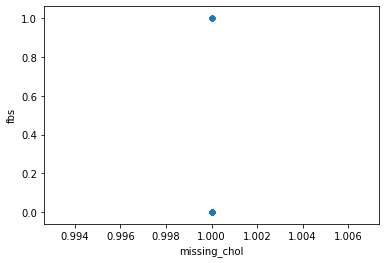

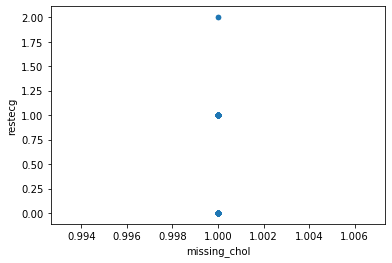

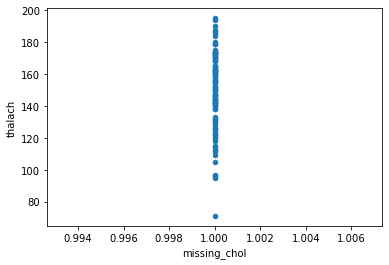

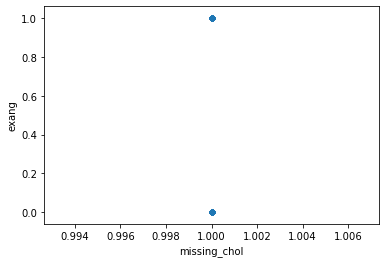

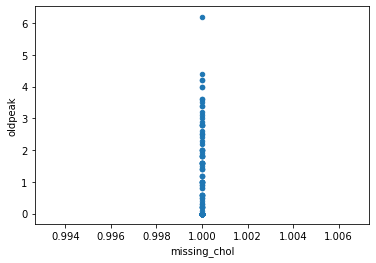

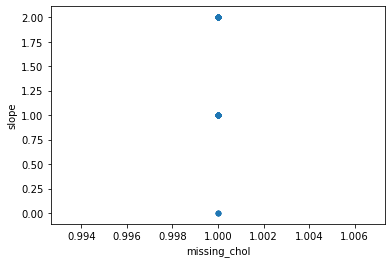

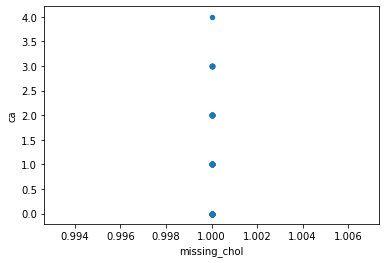

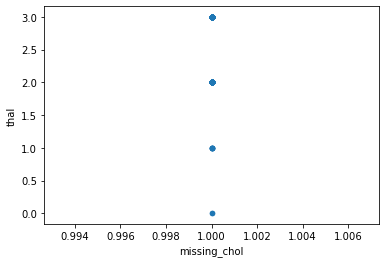

In [32]:
missing_chol_df.plot.scatter("missing_chol", "age")
missing_chol_df.plot.scatter("missing_chol", "cp")
missing_chol_df.plot.scatter("missing_chol", "sex")
missing_chol_df.plot.scatter("missing_chol", "trestbps")
missing_chol_df.plot.scatter("missing_chol", "fbs")
missing_chol_df.plot.scatter("missing_chol", "restecg")
missing_chol_df.plot.scatter("missing_chol", "thalach")
missing_chol_df.plot.scatter("missing_chol", "exang")
missing_chol_df.plot.scatter("missing_chol", "oldpeak")
missing_chol_df.plot.scatter("missing_chol", "slope")
missing_chol_df.plot.scatter("missing_chol", "ca")
missing_chol_df.plot.scatter("missing_chol", "thal")

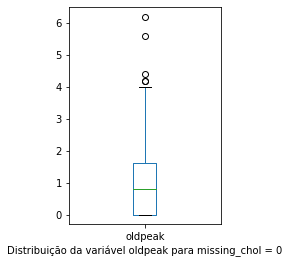

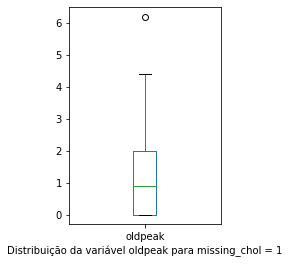

In [44]:
oldpeak_all = chol_df['oldpeak']
oldpeak_missing = missing_chol_df['oldpeak']

ax1 = plt.subplot(1, 2, 1)
ax1.set_xlabel("Distribuição da variável oldpeak para missing_chol = 0")
plt.show(oldpeak_all.plot.box())

ax2 = plt.subplot(1, 2, 2)
ax2.set_xlabel("Distribuição da variável oldpeak para missing_chol = 1")
plt.show(oldpeak_missing.plot.box())

Novamente, estudando com cuidado o comportamento de distribuição dos quartis, é possível identificar alguns pontos de atenção quando comparamos os valores dos quartis do banco de dados completo versus os quartis do banco de dados quando sex igual a valores vazios:

In [33]:
chol_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_chol
count,303.000000,303.000000,303.000000,303.000000,190.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.826316,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.372937
std,9.082101,0.466011,1.032052,17.538143,50.095743,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.484386
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


In [34]:
missing_chol_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,missing_chol
count,113.000000,113.000000,113.000000,113.000000,0.0,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.0
mean,54.584071,0.707965,0.964602,133.460177,NaN,0.159292,0.548673,150.044248,0.353982,1.215044,1.398230,0.734513,2.362832,0.504425,1.0
std,9.232827,0.456724,1.043083,18.560247,NaN,0.367578,0.534375,23.704049,0.480334,1.340457,0.620193,1.009046,0.682196,0.502208,0.0
min,35.000000,0.000000,0.000000,94.000000,NaN,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,47.000000,0.000000,0.000000,120.000000,NaN,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.0
50%,55.000000,1.000000,1.000000,130.000000,NaN,0.000000,1.000000,152.000000,0.000000,0.900000,1.000000,0.000000,2.000000,1.000000,1.0
75%,61.000000,1.000000,2.000000,140.000000,NaN,0.000000,1.000000,168.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.0
max,77.000000,1.000000,3.000000,192.000000,NaN,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.0


Novamente, uma das distribuições das variáveis sugerem um padrão MNAR (Missing not at Random), uma vez, comparando Q1, Q2 (mediana) e Q3 temos um claro indício de que oldpeak têm padrão de distribuição bastante alterado quando a variavel chol está vazia, conforme comparativo abaixo:


| old peak  |  banco de dados original | banco de dados filtrado pelos dados faltantes de colesterol |
| --------- | ------------------------ | ----------------------------------------------------------- |
| Média         | 1,039 | 1,215 |
| Desvio Padrão | 1,16  | 1,34  |
| Mínimo        | 0     | 0     |
| Q1 (P25)      | 0     | 0     |
| Q2 (Mediana)  | 0,8   | 0,9   |
| Q3 (P75)      | 1,6   | 2     |
| Máximo        | 6,2   | 6,2   |

Ao que tudo indica, quando a variável chol está vazia, a concentração de valores de oldpeak se corresponde a valores maiores. Portanto, novamente estamos diante de um padrão **MNAR**.

# Conclusão

Para os 3 exercícios realizados, identificamos padrões diferentes de comportamento de distribuição entre as variáveis. Enquanto no primeiro exemplo temos um padrão MAR (Missing at Random) por estar dependente do sexo 0 (zero), mas não dos valores faltantes de idade, para os dois outros exemplos identificamos o padrão MNAR, para a variável oldpeak, que se concentra em valores menos para a variável sex vazia, e em valores maiores para a variável chol vazias. Conforme encontramos em múltiplos materiais de referência, o MCAR costuma ser irreal para os conjuntos de dados, sendo classificado quando não se identifica comportamento dos dois demais padrões, nos parecendo bastante plausíveis as conclusões a que chegamos.

# Estratégia de reposição

Como forma de reposição dos dados faltantes podemos sugerimos que os dados faltantes sejam preenchidos com a mediana. Desse forma, o comportamento das distribuições das demais variáveis não seráo muito afetadas.

Outra opção seria preencher os valores com a média, porém ao fazer isso, é possível que a distribuição dos dados fosse distorcida devido a outliers 

# Referências

https://www.lume.ufrgs.br/handle/10183/178441?show=full 

https://stefvanbuuren.name/fimd/sec-MCAR.html

https://s3.amazonaws.com/assets.datacamp.com/production/course_17404/slides/chapter2.pdf
